In [59]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from src.data_loader import ViTDataLoader
from src.vit_train import load_model_dir
from src.vit_data import load_cd_data_24x128

model_dir = 'output/24x_120_merge_20220531_e171'

vit, config = load_model_dir(model_dir, legacy=True)
vit_data = load_cd_data_24x128()
config_name = "24x_120"

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader, resume=True, resume_path=model_dir)

Split: time,120.0; Training: 19925; Validation: 2210; Testing: 4427


In [61]:
trainer.setup()

Resuming from 21420...


In [62]:
trainer.compute_predictions_losses()

In [63]:
print(trainer.perf_str)

Loss:
  Train:	0.062
  Valid:	0.066
  Test: 	0.448

R2:
  Train:	0.939
  Valid:	0.932
  Test: 	0.517


0

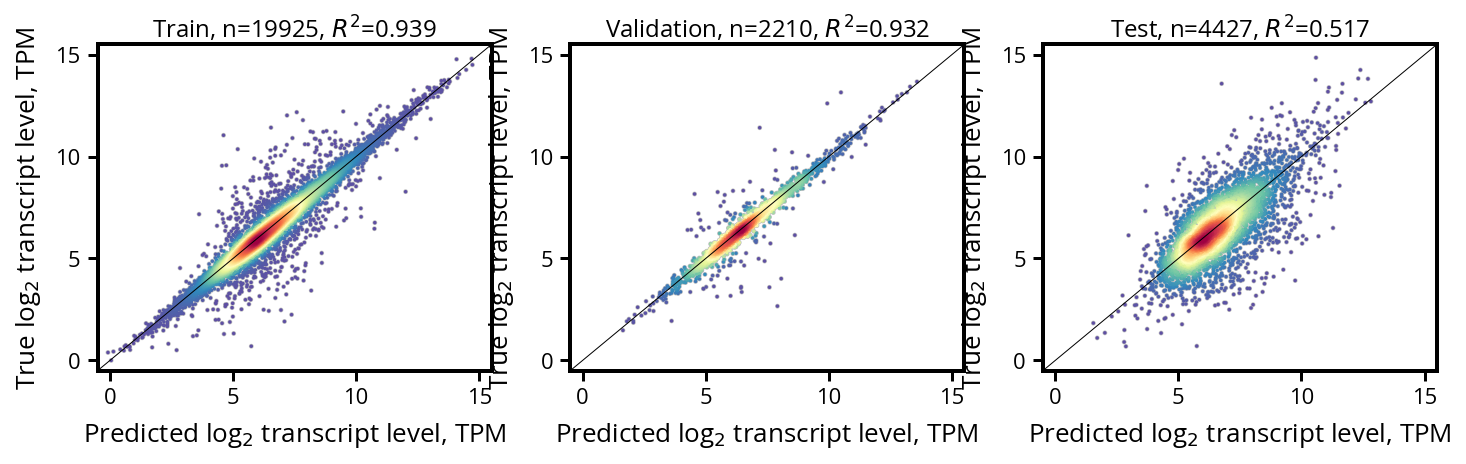

In [64]:
trainer.plot_predictions()
0

In [65]:
from src.rna_plotter import load_rna_plotter
from src.orf_plotter import ORFAnnotationPlotter

orf_plotter = ORFAnnotationPlotter()
rna_plotter = load_rna_plotter()
trainer.orf_plotter = orf_plotter
trainer.rna_plotter = rna_plotter


0

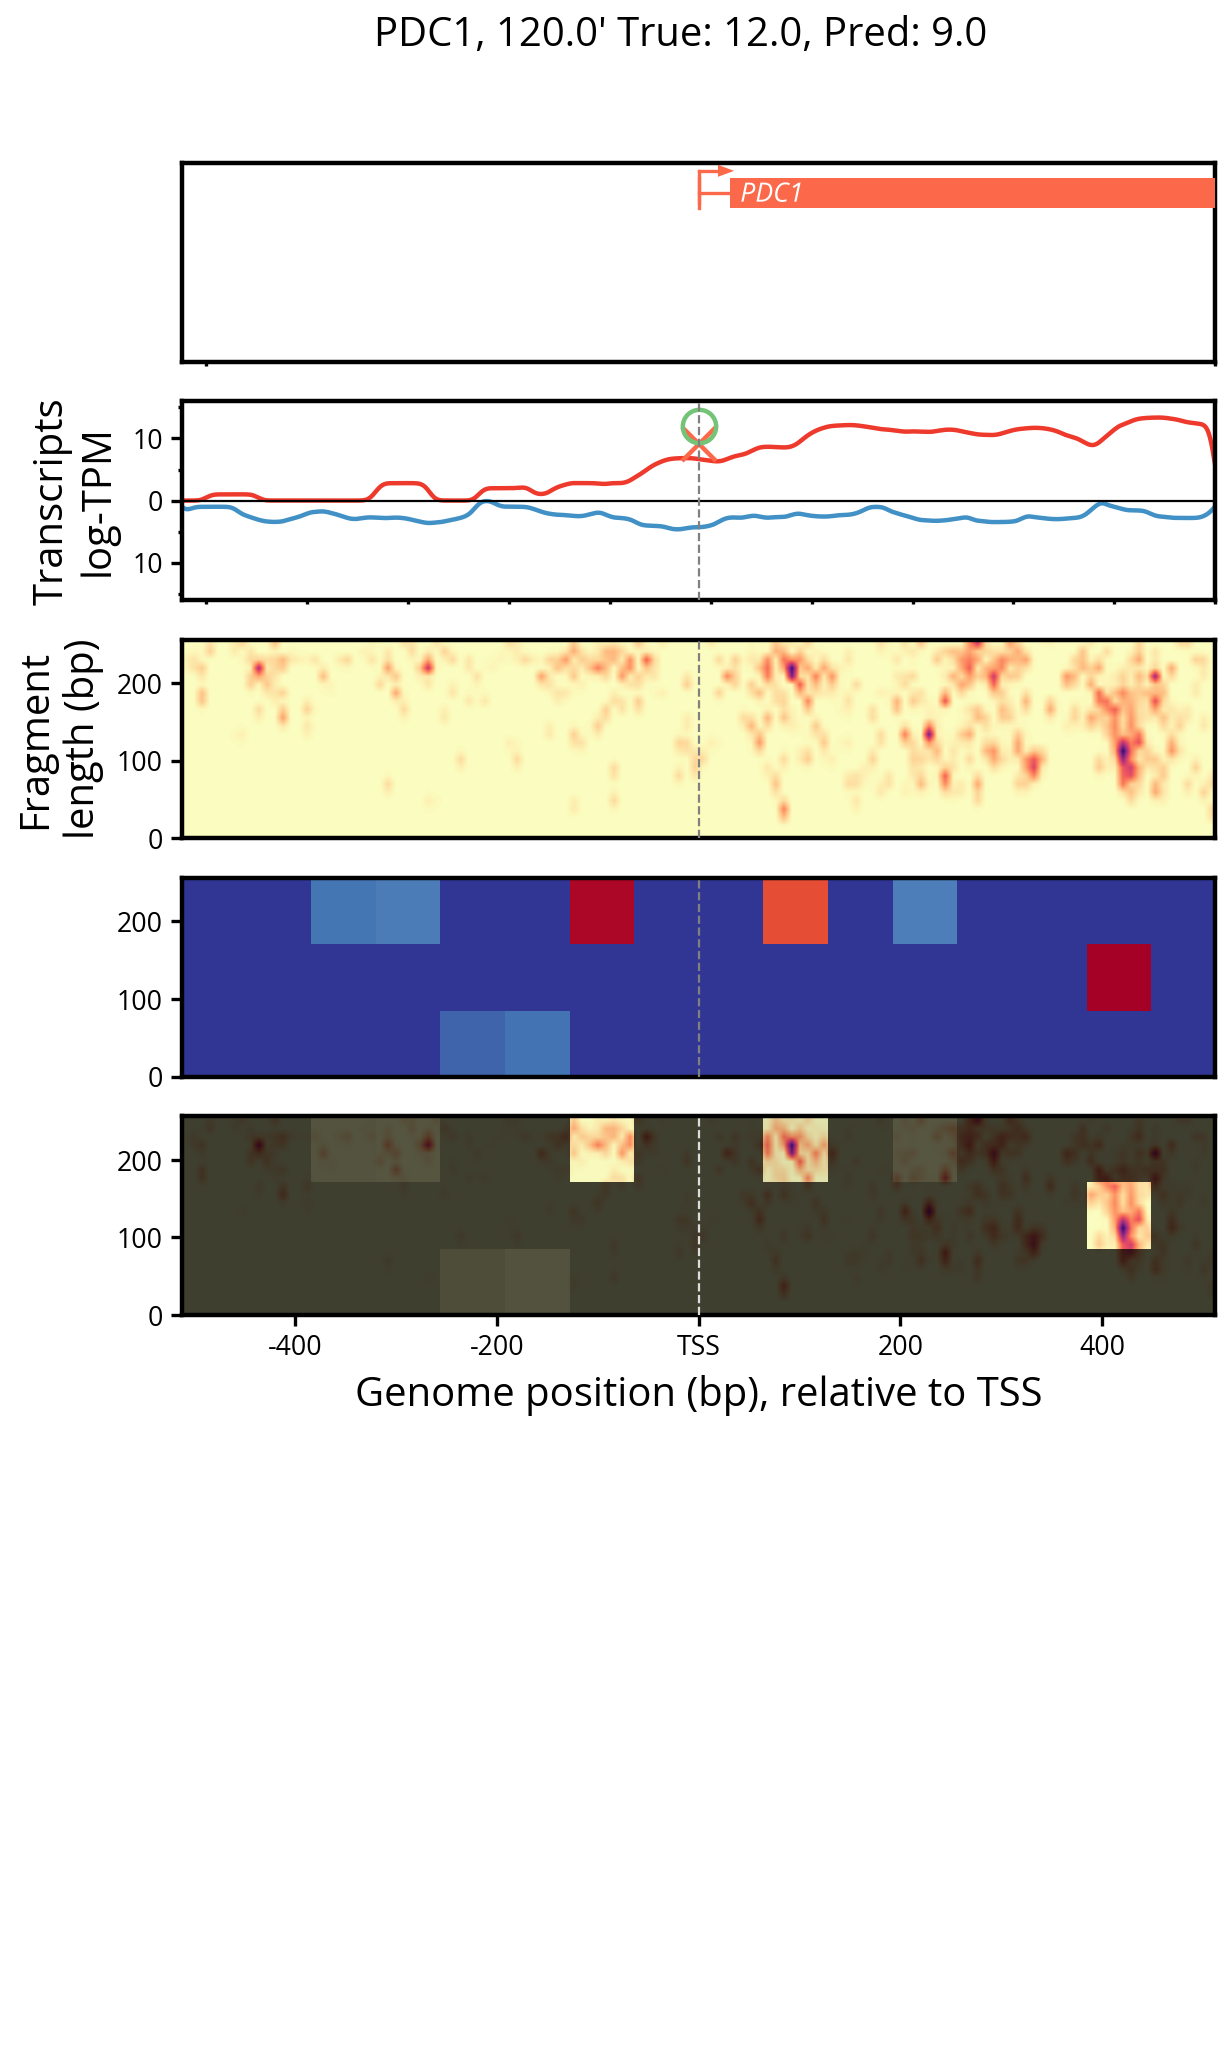

In [76]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('PDC1', 120.0)
0

In [87]:
trainer.compute_attentions()

1/26562 - 00:00:00.03
1001/26562 - 00:00:22.92
2001/26562 - 00:00:48.03
3001/26562 - 00:01:14.41
4001/26562 - 00:01:41.19
5001/26562 - 00:02:09.98
6001/26562 - 00:02:34.67
7001/26562 - 00:03:01.46
8001/26562 - 00:03:25.08
9001/26562 - 00:03:50.98
10001/26562 - 00:04:14.49
11001/26562 - 00:04:40.70
12001/26562 - 00:05:06.33
13001/26562 - 00:05:30.90
14001/26562 - 00:05:55.61
15001/26562 - 00:06:19.87
16001/26562 - 00:06:43.08
17001/26562 - 00:07:08.84
18001/26562 - 00:07:34.59
19001/26562 - 00:08:01.70
20001/26562 - 00:08:26.78
21001/26562 - 00:08:52.36
22001/26562 - 00:09:16.76
23001/26562 - 00:09:45.01
24001/26562 - 00:10:10.53
25001/26562 - 00:10:34.72
26001/26562 - 00:11:00.61


array([[[1.00301169e-01, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 8.37545097e-02, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.99793452e-01, 0.00000000e+00],
        [0.00000000e+00, 4.80963103e-02, 2.89353609e-01, ...,
         3.12016375e-04, 6.62842914e-02, 0.00000000e+00]],

       [[7.77227283e-02, 0.00000000e+00, 5.73857571e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.15127869e-02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 7.60850608e-02, 0.00000000e+00],
        [1.88543322e-03, 6.77753761e-02, 2.99819633e-02, ...,
         3.00242398e-02, 3.41569930e-02, 0.00000000e+00]],

       [[1.26271369e-02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.92024615e-02, 0.00000000e+00, ...,
         0.00000000e+00, 2.23307544e-03, 0.00000000e+00],
        [2.64685184e-01, 4.03095156e

In [91]:
trainer.collected_attentions.shape

(26562, 3, 16)

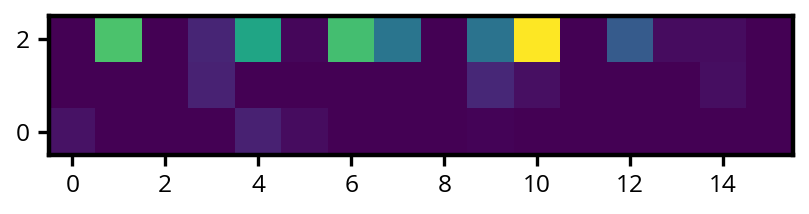

In [99]:
plt.imshow(trainer.collected_attentions[10], origin='lower', cmap='viridis')

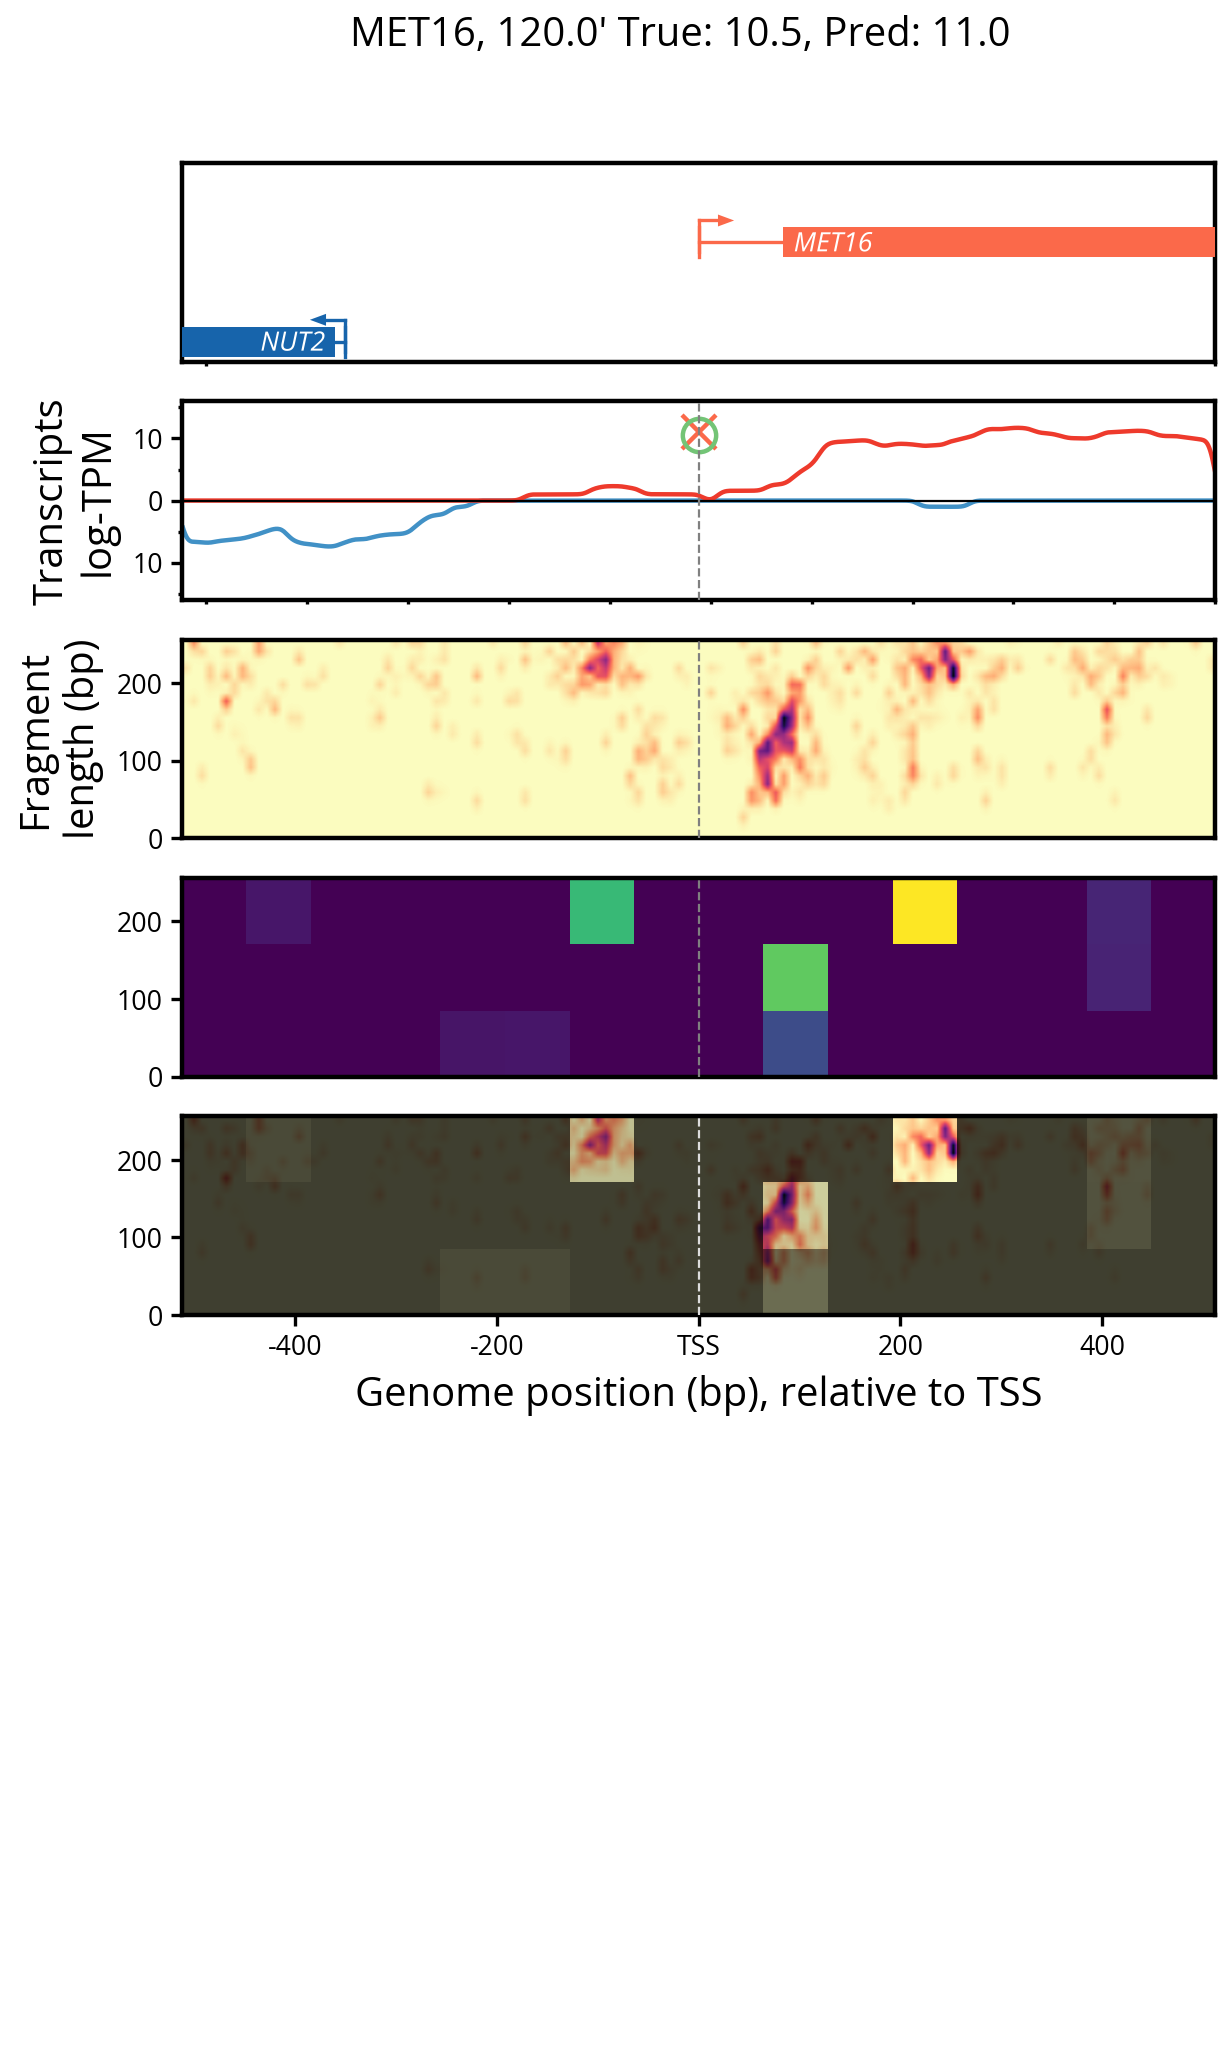

In [101]:
trainer.plot_gene('MET16', 120.0)